# Data Preprocessing and Analysis 

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [175]:
data = pd.read_csv("../../dataset/dataset.csv").drop("Unnamed: 0", axis=1)

In [176]:
data.shape

(32963, 41)

## Randomly splitting the dataset into 3 parts

In [177]:
historyData = data.sample(frac=0.5)
incrementalData = data.drop(historyData.index)
incrementalData1 = incrementalData.sample(frac=0.5)
incrementalData2 = incrementalData.drop(incrementalData1.index)

In [178]:
historyData.to_csv("../../dataset/historyData/historyData.csv", index=False)
incrementalData1.to_csv("../../dataset/incrementalData/incData1.csv", index=False)
incrementalData2.to_csv("../../dataset/incrementalData/incData2.csv", index=False)

## Data preprocessing and analysis

In [179]:
data = pd.read_csv("../../dataset/incrementalData/incData1.csv")
data.shape

(8240, 41)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                8240 non-null   int64 
 1   Area                 8240 non-null   int64 
 2   Location             8240 non-null   object
 3   No. of Bedrooms      8240 non-null   int64 
 4   Resale               8240 non-null   int64 
 5   MaintenanceStaff     8240 non-null   int64 
 6   Gymnasium            8240 non-null   int64 
 7   SwimmingPool         8240 non-null   int64 
 8   LandscapedGardens    8240 non-null   int64 
 9   JoggingTrack         8240 non-null   int64 
 10  RainWaterHarvesting  8240 non-null   int64 
 11  IndoorGames          8240 non-null   int64 
 12  ShoppingMall         8240 non-null   int64 
 13  Intercom             8240 non-null   int64 
 14  SportsFacility       8240 non-null   int64 
 15  ATM                  8240 non-null   int64 
 16  ClubHo

### Getting the null values

In [181]:
missing_value = ((data.isnull().sum())/len(data)) * 100 
#missing_value.to_dict()
missing_value

Price                  0.0
Area                   0.0
Location               0.0
No. of Bedrooms        0.0
Resale                 0.0
MaintenanceStaff       0.0
Gymnasium              0.0
SwimmingPool           0.0
LandscapedGardens      0.0
JoggingTrack           0.0
RainWaterHarvesting    0.0
IndoorGames            0.0
ShoppingMall           0.0
Intercom               0.0
SportsFacility         0.0
ATM                    0.0
ClubHouse              0.0
School                 0.0
24X7Security           0.0
PowerBackup            0.0
CarParking             0.0
StaffQuarter           0.0
Cafeteria              0.0
MultipurposeRoom       0.0
Hospital               0.0
WashingMachine         0.0
Gasconnection          0.0
AC                     0.0
Wifi                   0.0
Children'splayarea     0.0
LiftAvailable          0.0
BED                    0.0
VaastuCompliant        0.0
Microwave              0.0
GolfCourse             0.0
TV                     0.0
DiningTable            0.0
S

In [182]:
numerical_data = [num for num in data.drop("Price", axis=1).columns if data[num].dtype!="O"]
categorical_data = [cat for cat in data.drop("Price", axis=1).columns if cat not in numerical_data]
numerical_data

['Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [183]:
categorical_data

['Location', 'State']

### taking care of missing values in categorical data

In [184]:

for i in categorical_data:
    print(f"{i}: {data[i].unique()}")

Location: ['Perungudi' 'Nungambakkam' 'Panvel' ... 'Sri Krishna Garden Layout'
 'Ring Road' 'Vijaya Bank Layout']
State: ['Chennai' 'Mumbai' 'Hyderabad' 'Delhi' 'Bangalore' 'Kolkata']


In [185]:
cat_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data[categorical_data] = cat_imp.fit_transform(data[categorical_data])

In [186]:
data[categorical_data].isnull().sum()

Location    0
State       0
dtype: int64

### Taking care of missing values in numerical cols

In [187]:
data[numerical_data].isnull().sum()

Area                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
dtype: int64

In [188]:
num_imp = SimpleImputer(missing_values=np.nan, strategy="mean")
data[numerical_data] = num_imp.fit_transform(data[numerical_data])

In [189]:
data[numerical_data].isnull().sum()

Area                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
dtype: int64

### Remove non-correlated data

C:\Users\debor\AppData\Local\Temp\ipykernel_8660\2679073343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price'].sort_values(ascending=True).plot(kind="bar")


<AxesSubplot: >

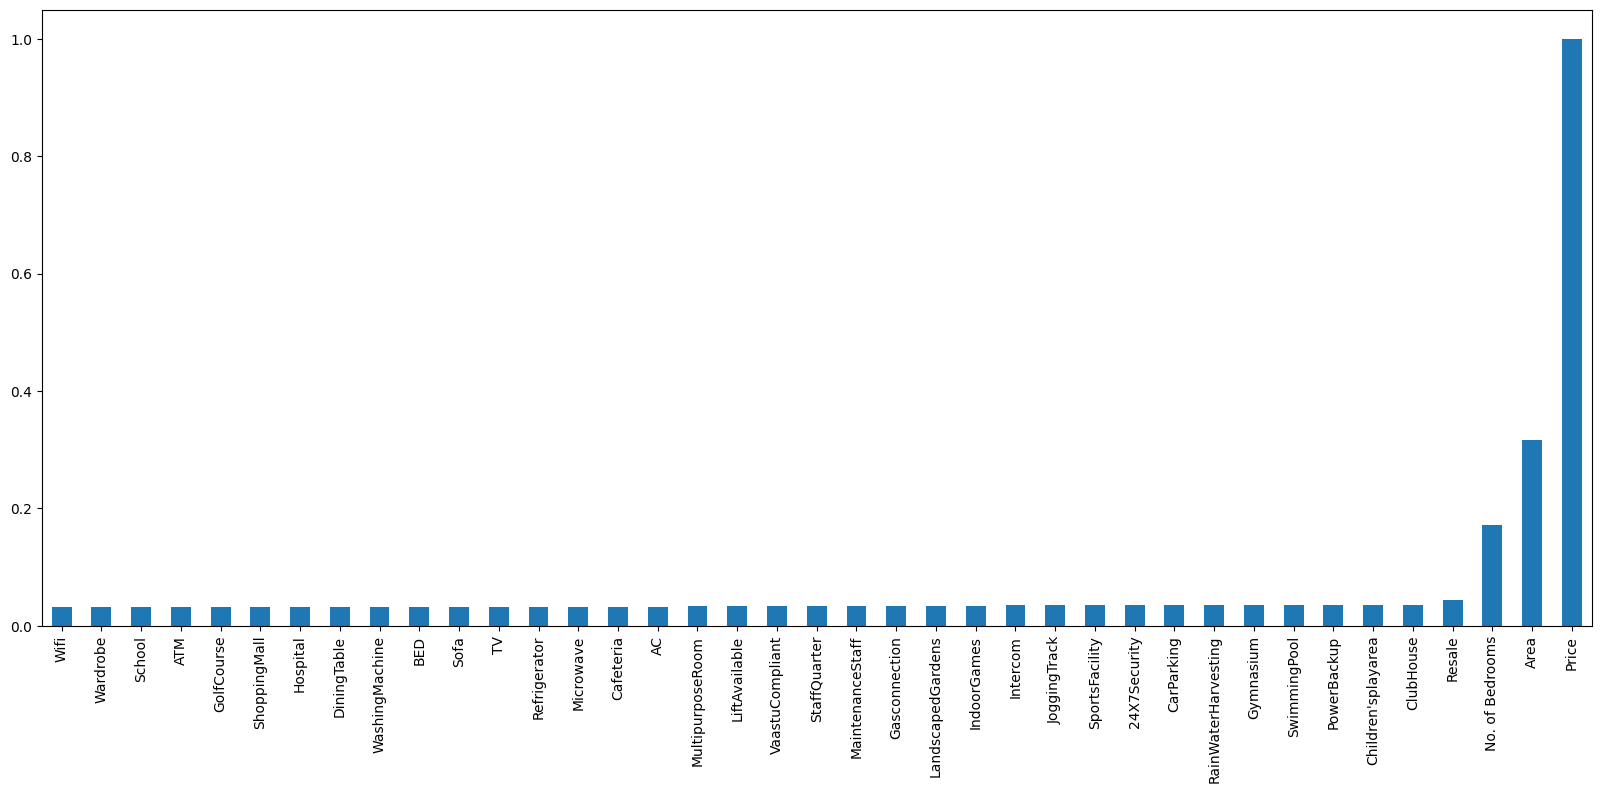

In [190]:
plt.figure(figsize=(20, 8))
data.corr()['Price'].sort_values(ascending=True).plot(kind="bar")

In [191]:
# pairplot = sns.pairplot(data, hue="Price")
# fig = pairplot.fig
# fig.savefig("../plots/pairplot.png")

In [192]:
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]
data.drop(to_drop, axis=1, inplace=True)

C:\Users\debor\AppData\Local\Temp\ipykernel_8660\250319296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()


In [193]:
to_drop

['No. of Bedrooms',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [194]:
data.columns

Index(['Price', 'Area', 'Location', 'Resale', 'MaintenanceStaff', 'State'], dtype='object')

In [195]:
# remove all the columns not requred from numerical col list and categorical call list
for not_req in to_drop:
    if not_req in numerical_data:
        numerical_data.remove(not_req)
    elif not_req in categorical_data:
        categorical_data.remove(not_req)
    else:
        pass

In [196]:
len(numerical_data)+len(categorical_data)

5

#### Visualizing data to get insights 

<AxesSubplot: xlabel='Area', ylabel='Price'>

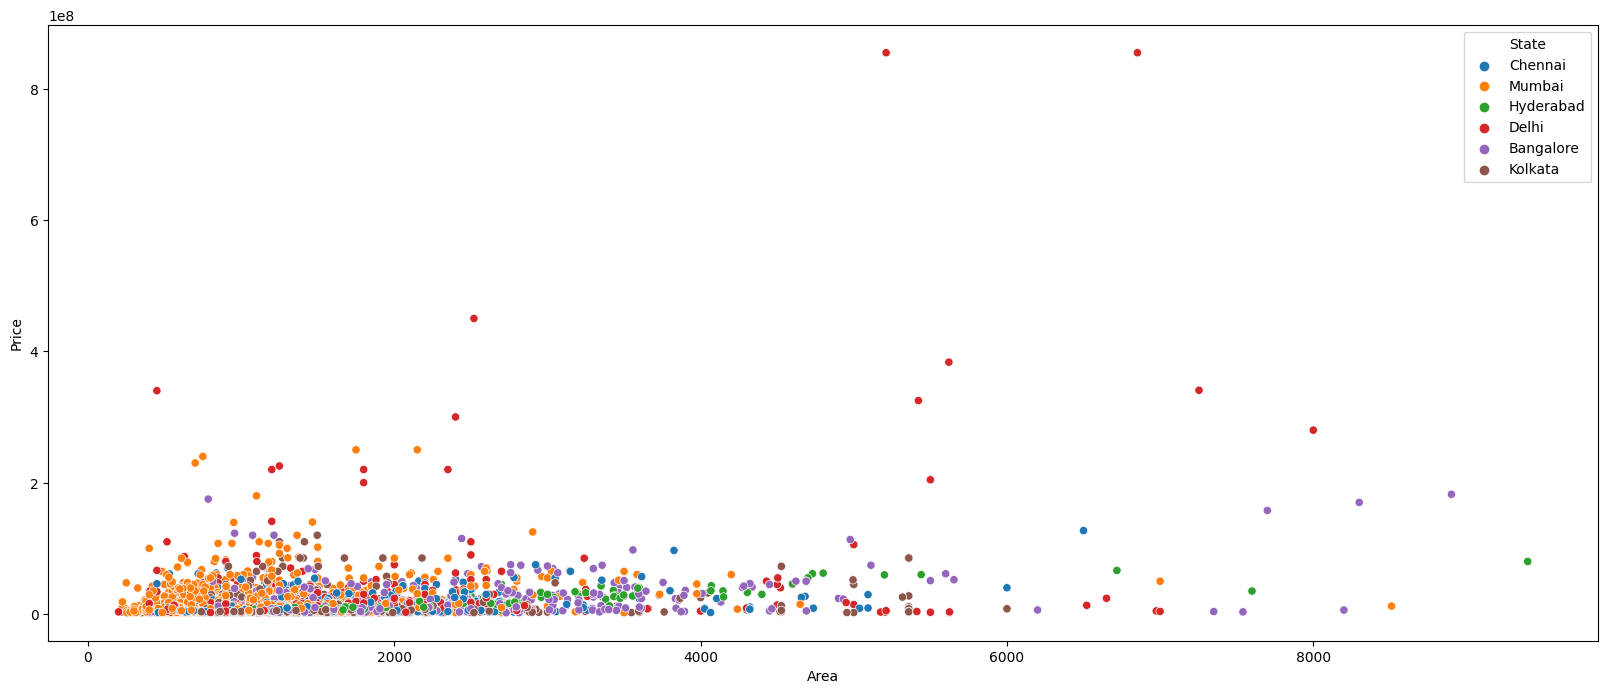

In [197]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x = "Area", y = "Price", hue="State")


<AxesSubplot: xlabel='MaintenanceStaff', ylabel='Price'>

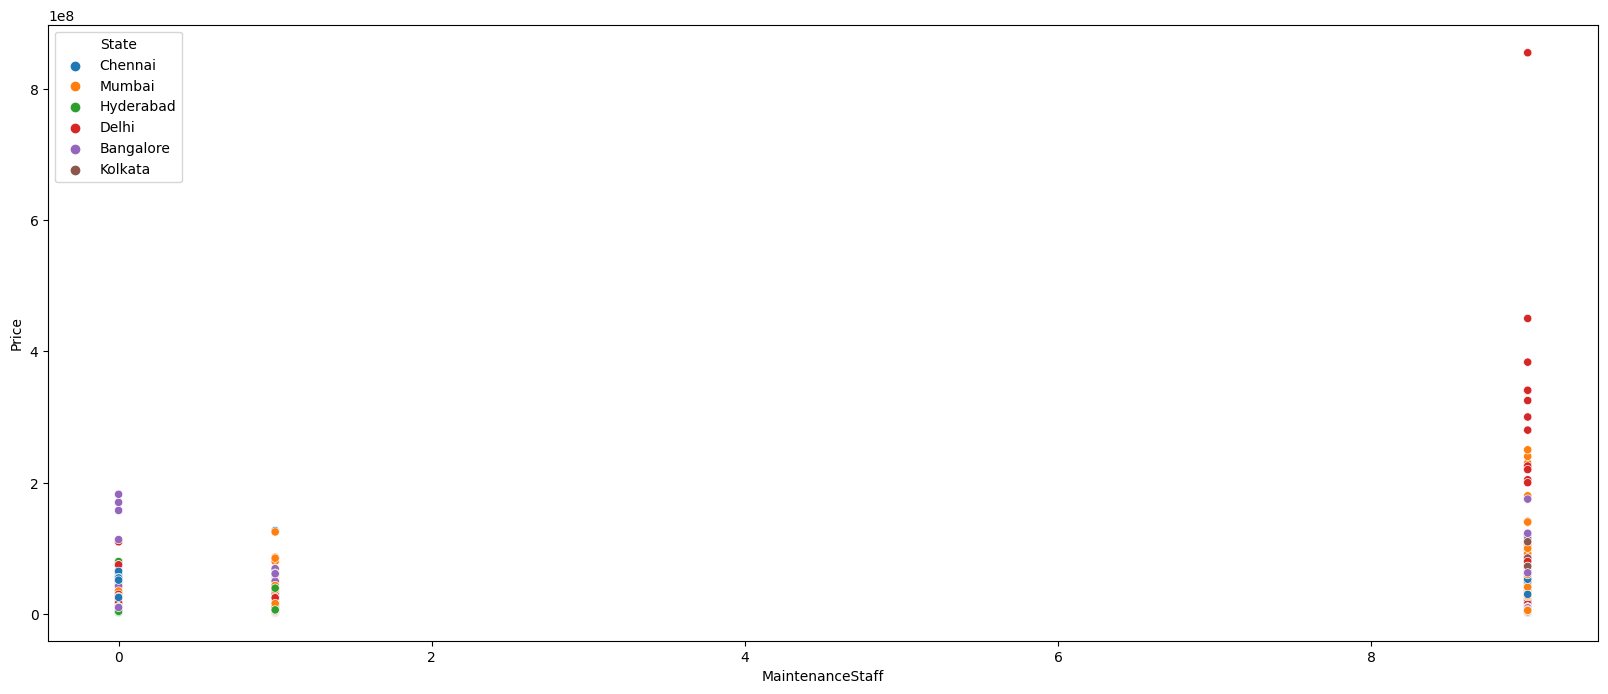

In [198]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x = "MaintenanceStaff", y = "Price", hue="State")

#### as we can see that maintainance cols is a categorical value, so we can convert the dtype to object

In [199]:
data["MaintenanceStaff"] = data["MaintenanceStaff"].astype("object")
data["Resale"] = data["Resale"].astype("object")

In [200]:
data["MaintenanceStaff"].unique()

array([0.0, 9.0, 1.0], dtype=object)

In [201]:
data["Resale"].unique()

array([0.0, 1.0], dtype=object)

### Dividing the dataset into features and labels 

In [210]:
features = data.drop('Price', axis=1)
labels = data['Price']

In [211]:
features.dtypes

Area                float64
Location             object
Resale               object
MaintenanceStaff     object
State                object
dtype: object

In [204]:
# creating dummy variables using pd.get_dummies
features = pd.get_dummies(features)
features.shape

C:\Users\debor\AppData\Local\Temp\ipykernel_8660\4272754853.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  features = pd.get_dummies(features)


(8240, 1074)

In [205]:
# Standardising the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [207]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6592, 1074), (1648, 1074), (6592,), (1648,))

In [208]:
to_drop

['No. of Bedrooms',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']